In [128]:
path= r"C:\Users\anupam kumar\Downloads\borrow-assistant\artifacts\intent-classifier_data.csv"

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(path)


In [130]:
df.shape

(1093, 2)

In [131]:
#name the columns of the dataframe as "text" and "intent"
df.columns = ["text", "intent"] 



In [132]:
df['intent'].value_counts()


intent
add_entry       361
subtraction     192
show_balance    185
actions         179
delete_entry    175
subtracton        1
Name: count, dtype: int64

In [133]:
df.head()


,text,intent
0,Neha ka balance check karo,show_balance
1,15 rupee kat do Rajesh ke khate se,subtraction
2,Anita ke 30 rupaye add kar do,add_entry
3,Delete karo 25 rupaye wala entry Sandeep ka,delete_entry
4,Kavita ka hisaab kitab email karo,actions


In [134]:
x=df['text']
y=df['intent']

In [135]:
# #aplly cleaning on the text data and then apply the count vectorizer for hinglish text data

# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from sklearn.feature_extraction.text import CountVectorizer

# nltk.download('stopwords')
# nltk.download('wordnet')
# corpus = []
# for i in range(0, len(df)):
#     review = re.sub('[^0-9a-zA-Z]', ' ', df['text'][i])
#     review = review.lower()
#     review = review.split()
#     lemmatizer = WordNetLemmatizer()
#     review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))] 
#     review = ' '.join(review)
#     corpus.append(review)


# X = corpus
# y = df.iloc[:, 1].values



[nltk_data] Downloading package stopwords to C:\Users\anupam
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\anupam
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [158]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def clean_text(text):
  """
  This function cleans the text data by removing non-alphanumeric characters,
   converting to lowercase, removing custom stop words and named entities,
  lemmatization, and joining the tokens back into a string.

  Args:
      text: The text data to be cleaned.

  Returns:
      The cleaned text data.
  """

  # Remove non-alphanumeric characters
  text = re.sub(r"[^a-zA-Z\s]", ' ', text)

  # Convert to lowercase
  text = text.lower()

  # Define custom stop words
  custom_stop_words = ["ka", "ke", "ki", "unka", "unke", "se"]

  # Tokenize the sentence
  words = word_tokenize(text)

  # Tag parts of speech
  pos_tags = pos_tag(words)

  # Chunk named entities
  named_entities = ne_chunk(pos_tags, binary=True)

  # Filter out custom stop words and names, perform lemmatization
  filtered_words = [WordNetLemmatizer().lemmatize(word) for word, tag in named_entities.leaves()
                    if word.lower() not in custom_stop_words and tag != 'NE']

  # Join the filtered tokens back into a string
  cleaned_text = ' '.join(filtered_words)

  return cleaned_text

# Clean the text data in your corpus
corpus = [clean_text(text) for text in df['text']]

# Convert the cleaned text data to a vector representation
# X = CountVectorizer().fit_transform(corpus)
X=corpus
# Get the target labels
y = df.iloc[:, 1].values


[nltk_data] Downloading package stopwords to C:\Users\anupam
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\anupam
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\anupam
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anupam kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\anupam
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\anupam
[nltk_data]     kumar\AppData\Roaming\nltk_data...


In [159]:
X

['neha balance check karo',
 'rupee kat do rajesh khate',
 'anita rupaye add kar do',
 'delete karo rupaye wala entry sandeep',
 'kavita hisaab kitab email karo',
 'show rahul s total balance',
 'rupaye ghata do preeti account',
 'amit rupee jama karo',
 'suresh statement generate karo',
 'rupaye kaat do meena khate',
 'ravi rupaye add kar do',
 'pooja current balance batao',
 'rupaye wali entry delete karo sanjay',
 'geeta rupee kat do',
 'rupaye jama karo vijay account mein',
 'shweta total expenditure dikhao',
 'nikhil rupaye minus karo',
 'rupaye add karo priyanka khate mein',
 'ashok statement bhejo whatsapp par',
 'rupaye entry mohan delete karo',
 'sunita rupee jama kar do',
 'ramesh balance sheet generate karo',
 'rupaye ghata do anjali account',
 'rohit rupaye add karo',
 'deepak current balance check karo',
 'rupaye wali entry manish kaat do',
 'sapna rupee jama karo',
 'alok hisaab kitab dikhao',
 'rupaye minus karo neeta khate',
 'rajiv rupaye add kar do',
 'sarita balance 

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['intent'], test_size=0.5, random_state=42)

In [161]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546,), (547,), (546,), (547,))

[nltk_data] Downloading package punkt to C:\Users\anupam
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.1956
Confusion Matrix:
[[ 91   0   0   0   0   0]
 [  0   0   0   5 180   0]
 [  0   0   0  85   0   0]
 [  2  88   0   0   2   0]
 [  0   0   0   0  16  78]
 [  0   0   0   0   0   0]]


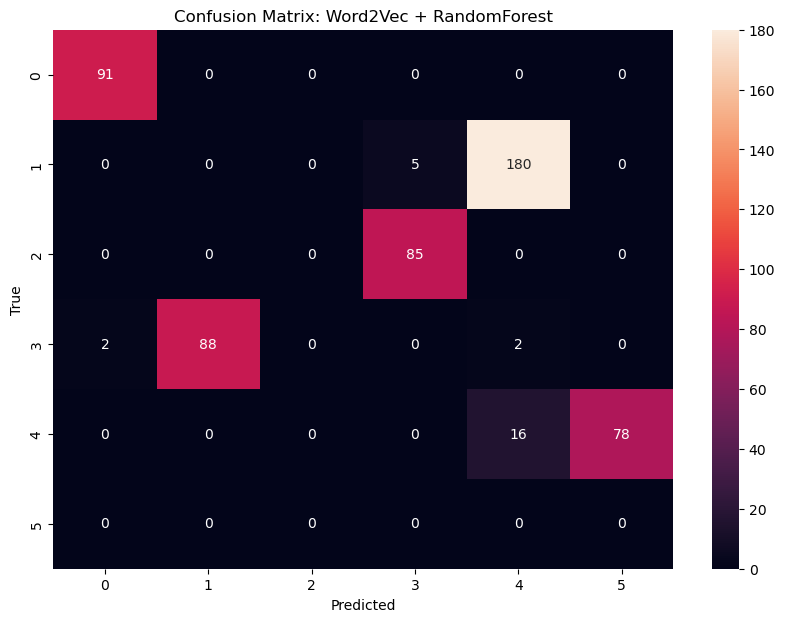

In [151]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')

# Custom transformer for Word2Vec
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=1, min_count=1, workers=2):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.model = None

    def fit(self, X, y=None):
        tokenized_X = [word_tokenize(doc.lower()) for doc in X]
        self.model = Word2Vec(sentences=tokenized_X, vector_size=self.vector_size, window=self.window, 
                              min_count=self.min_count, workers=self.workers)
        return self

    def transform(self, X):
        tokenized_X = [word_tokenize(doc.lower()) for doc in X]
        return np.array([
            np.mean([self.model.wv[word] for word in words if word in self.model.wv] 
                    or [np.zeros(self.vector_size)], axis=0)
            for words in tokenized_X
        ])

# Custom classifier with predict method returning intent and confidence
class IntentClassifier:
    def __init__(self, vector_size=100, window=5, min_count=1, workers=2):
        self.pipeline = Pipeline([
            ('features', Word2VecVectorizer(vector_size=vector_size, window=window, 
                                            min_count=min_count, workers=workers)),
            ('classifier', RandomForestClassifier())
        ])
        self.intents = None

    def fit(self, X, y):
        self.intents = list(set(y))
        self.pipeline.fit(X, y)

    def predict(self, phrase):
        # Get probability distribution
        proba = self.pipeline.predict_proba([phrase])[0]
        # Get the index of the highest probability
        intent_index = np.argmax(proba)
        # Get the intent and confidence
        intent = self.intents[intent_index]
        confidence = proba[intent_index]
        return intent, confidence

# Function to create and evaluate the classifier
def evaluate_classifier(X_train, y_train, X_test, y_test):
    classifier = IntentClassifier()
    classifier.fit(X_train, y_train)
    
    # Evaluate on test set
    predictions = [classifier.predict(x)[0] for x in X_test]
    score = sum(p == t for p, t in zip(predictions, y_test)) / len(y_test)
    cm = confusion_matrix(y_test, predictions)
        
    # Print accuracy and confusion matrix
    print(f"Accuracy: {score:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix: Word2Vec + RandomForest")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return classifier

# Assuming X_train, X_test, y_train, y_test are already defined
classifier = evaluate_classifier(X_train, y_train, X_test, y_test)

In [140]:
test_phrases = [
    "15 rupaye likho geeta ke liye",
    "shubhm ka total kitna hai",
    "Hata do 30 rupaye wali entry",
    "40 rupee likh do mina ke",
    "aau ke 30 rupee jama kar do"
]

# Test the classifier on the phrases
print("\nTesting classifier on new phrases:")
for phrase in test_phrases:
    intent, confidence = classifier.predict(phrase)
    print(f"Phrase: {phrase}")
    print(f"Predicted Intent: {intent}")
    print(f"Confidence: {confidence:.2f}\n")


Testing classifier on new phrases:
Phrase: 15 rupaye likho geeta ke liye
Predicted Intent: subtracton
Confidence: 0.37

Phrase: shubhm ka total kitna hai
Predicted Intent: subtraction
Confidence: 0.40

Phrase: Hata do 30 rupaye wali entry
Predicted Intent: subtraction
Confidence: 0.53

Phrase: 40 rupee likh do mina ke
Predicted Intent: subtraction
Confidence: 0.79

Phrase: aau ke 30 rupee jama kar do
Predicted Intent: subtraction
Confidence: 0.88



In [152]:
X



['Neha balance check karo',
 '15 rupee kat do Rajesh khate',
 'Anita 30 rupaye add kar do',
 'Delete karo 25 rupaye wala entry Sandeep',
 'Kavita hisaab kitab email karo',
 "Show Rahul 's total balance",
 '50 rupaye ghata do Preeti account',
 'Amit 40 rupee jama karo',
 'Suresh statement generate karo',
 '10 rupaye kaat do Meena khate',
 'Ravi 60 rupaye add kar do',
 'Pooja current balance batao',
 '35 rupaye wali entry delete karo Sanjay',
 'Geeta 25 rupee kat do',
 '80 rupaye jama karo Vijay account mein',
 'Shweta total expenditure dikhao',
 'Nikhil 45 rupaye minus karo',
 '100 rupaye add karo Priyanka khate mein',
 'Ashok statement bhejo WhatsApp par',
 '55 rupaye entry Mohan delete karo',
 'Sunita 70 rupee jama kar do',
 'Ramesh balance sheet generate karo',
 '30 rupaye ghata do Anjali account',
 'Rohit 85 rupaye add karo',
 'Deepak current balance check karo',
 '40 rupaye wali entry Manish kaat do',
 'Sapna 65 rupee jama karo',
 'Alok hisaab kitab dikhao',
 '95 rupaye minus karo 

In [162]:
#applyin bag of word with naive bays

from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=5000)
X= cv.fit_transform(corpus).toarray()

In [163]:
x= pd.DataFrame(X)
x

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
y

array(['show_balance', 'subtraction', 'add_entry', ..., 'add_entry',
       'actions', 'add_entry'], dtype=object)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20, random_state=0)

In [178]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

# from sklearn.metrics import accuracy_score
# accuracy= accuracy_score(y_test, y_pred)
# accuracy


array([[36,  0,  0,  0,  0],
       [ 0, 77,  0,  0,  0],
       [ 0,  0, 32,  0,  0],
       [ 0,  0,  0, 36,  0],
       [ 0,  0,  0,  0, 38]], dtype=int64)

In [180]:
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'classifier' and 'cv' (CountVectorizer instance) are already defined





test_phrases = [
    "subham ka total kitna hai",
    "meena ke 40 rupee kaat do",
    "Hata do 30 rupaye wali entry",
    "40 rupee likh do mina ke",
    "aau ke 30 rupee jama kar do",
    "bhvaesh ke 20 rupee likh do"
]

# Preprocess and test the classifier on the phrases
print("\nTesting classifier on new phrases:")
for phrase in test_phrases:
    preprocessed_phrase = clean_text(phrase)
    vectorized_phrase = cv.transform([preprocessed_phrase]).toarray()
    intent = classifier.predict(vectorized_phrase)
    print(f"Phrase: {phrase}")
    print(f"Predicted Intent: {intent}")
    # print(f"Confidence: {confidence:.2f}\n")


Testing classifier on new phrases:
Phrase: subham ka total kitna hai
Predicted Intent: ['show_balance']
Phrase: meena ke 40 rupee kaat do
Predicted Intent: ['subtraction']
Phrase: Hata do 30 rupaye wali entry
Predicted Intent: ['delete_entry']
Phrase: 40 rupee likh do mina ke
Predicted Intent: ['subtraction']
Phrase: aau ke 30 rupee jama kar do
Predicted Intent: ['add_entry']
Phrase: bhvaesh ke 20 rupee likh do
Predicted Intent: ['subtraction']


In [182]:
from sklearn.naive_bayes import MultinomialNB
intent_detect_model= MultinomialNB().fit(X_train, y_train)

In [167]:
y_pred= intent_detect_model.predict(X_test)

In [168]:
from sklearn.metrics import confusion_matrix
confusion_m= confusion_matrix(y_test, y_pred)
confusion_m

array([[36,  0,  0,  0,  0],
       [ 0, 77,  0,  0,  0],
       [ 0,  0, 32,  0,  0],
       [ 1,  0,  0, 35,  0],
       [ 0,  0,  0,  0, 38]], dtype=int64)

In [169]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.9954337899543378

In [173]:
y_test = pd.DataFrame(y_test)
y_test

,0
0,add_entry
1,subtraction
2,subtraction
3,show_balance
4,subtraction
...,...
214,add_entry
215,add_entry
216,actions
217,show_balance


In [174]:
y_pred= pd.DataFrame(y_pred)
y_pred

,0
0,add_entry
1,subtraction
2,subtraction
3,show_balance
4,subtraction
...,...
214,add_entry
215,add_entry
216,actions
217,show_balance


In [171]:
# from nltk.stem import PorterStemmer

# ps = PorterStemmer()

# input_message= input("Enter the message to check spam or not: ")
# input_message= re.sub('[^a-zA-Z]', ' ', input_message)
# input_message= input_message.lower()
# input_message= input_message.split()
# input_message= [ps.stem(word) for word in input_message if not word in set(stopwords.words('english'))]
# input_message= ' '.join(input_message)
# input_message= [input_message]
# input_message= cv.transform(input_message).toarray()
# # 

# test_phrases = [
#     "15 rupaye likho geeta ke liye",
#     "shubhm ka total kitna hai",
#     "Hata do 30 rupaye wali entry",
#     "40 rupee likh do mina ke",
#     "aau ke 30 rupee jama kar do"
# ]

# # Test the classifier on the phrases
# print("\nTesting classifier on new phrases:")
# for phrase in test_phrases:
#     intent, confidence = classifier.predict(phrase)
#     print(f"Phrase: {phrase}")
#     print(f"Predicted Intent: {intent}")
#     print(f"Confidence: {confidence:.2f}\n")

In [183]:
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'classifier' and 'cv' (CountVectorizer instance) are already defined





test_phrases = [
    "subham ka total kitna hai",
    "meena ke 40 rupee kaat do",
    "Hata do 30 rupaye wali entry",
    "40 rupee likh do mina ke",
    "aau ke 30 rupee jama kar do",
    "bhvaesh ke 20 rupee likh do"
]

# Preprocess and test the classifier on the phrases
print("\nTesting classifier on new phrases:")
for phrase in test_phrases:
    preprocessed_phrase = clean_text(phrase)
    vectorized_phrase = cv.transform([preprocessed_phrase]).toarray()
    intent = intent_detect_model.predict(vectorized_phrase)
    print(f"Phrase: {phrase}")
    print(f"Predicted Intent: {intent}")
    # print(f"Confidence: {confidence:.2f}\n")


Testing classifier on new phrases:
Phrase: subham ka total kitna hai
Predicted Intent: ['show_balance']
Phrase: meena ke 40 rupee kaat do
Predicted Intent: ['subtraction']
Phrase: Hata do 30 rupaye wali entry
Predicted Intent: ['delete_entry']
Phrase: 40 rupee likh do mina ke
Predicted Intent: ['add_entry']
Phrase: aau ke 30 rupee jama kar do
Predicted Intent: ['add_entry']
Phrase: bhvaesh ke 20 rupee likh do
Predicted Intent: ['add_entry']
